# Importing required libraries

In [1]:
# Importing metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# Importing libraries for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Importing methods for splitting data
from sklearn.model_selection import train_test_split

# Importing Libraries for scaling
from sklearn.preprocessing import StandardScaler


# Importing Data Analysis Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Importing Warnings
import warnings


# Setting Options
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Reading data and Initial Analysis

In [2]:
# reading the dataset

lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of the dataset

lead_df.shape

(9240, 37)

In [4]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Info on the dataset

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

 Looks like we have missing values in a lot of columns, we will look at the missing values in terms of percentages

# Analysing missing values

In [6]:
def view_missing(df):
    missing_df = pd.DataFrame()
    missing_df['Columns'] = df.columns
    missing_df['Missing_Values_Percentage'] = [(i / len(df)) * 100 for i in df.isnull().sum()]
    missing_df['Missing_Values_Percentage'] = round(missing_df['Missing_Values_Percentage'], 2)
    return missing_df.sort_values(by='Missing_Values_Percentage', ascending=False)

In [7]:
# Missing values in percentages

view_missing(lead_df)

,Columns,Missing_Values_Percentage
25,Lead Quality,51.59
30,Asymmetrique Activity Index,45.65
33,Asymmetrique Profile Score,45.65
32,Asymmetrique Activity Score,45.65
31,Asymmetrique Profile Index,45.65
24,Tags,36.29
28,Lead Profile,29.32
15,What matters most to you in choosing a course,29.32
14,What is your current occupation,29.11
11,Country,26.63


Columns with missing values

 - Lead Source
 - TotalVisits
 - Page Views Per Visit
 - Last Activity
 - Specialization
 - How did you hear about X Education
 - What is your current occupation
 - What matters most to you in choosing a course
 - Tags
 - Lead Quality
 - Lead Profile
 - City
 - Asymmetrique Activity Index
 - Asymmetrique Profile Index
 - Asymmetrique Activity Score
 - Asymmetrique Profile Index

## Treating Missing values

We will first look at the columns with relatively less missing values and probably drop the rows. We will then look at the columns with high number of missing values and by referring to the data dictionary or domain info from elsewhere we can either choose to drop the columns or impute the values accordingly

In [8]:
# looking at 'Lead Source'

lead_df[lead_df["Lead Source"].isnull()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
836,b2dfb7a5-814d-465b-816e-63d6b3a863ca,651660,Lead Add Form,NaN,Yes,No,1,NaN,1378,NaN,Email Bounced,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,Modified
1569,1c87e9fd-c675-468e-9653-2cc968f077f2,643899,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,SMS Sent
1746,215e9984-818a-42ff-ba1c-667ce73199a5,642394,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,16.0,No,No,Modified
2020,06f5b430-a45a-4de2-9aca-e13ee0a43589,640115,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
2025,e7524e35-923e-4c9f-800d-b18e1a6c5e3b,640081,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Select,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
2152,e54f76cc-2436-451c-8a29-fcd32ed7bed4,639134,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,SMS Sent
2346,c309cc6d-204f-4ac0-a766-7d326bd01218,637125,Lead Add Form,NaN,Yes,No,1,0.0,0,0.0,SMS Sent,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Select,02.Medium,02.Medium,14.0,16.0,No,No,SMS Sent
2544,175611de-436d-11e6-b61b-22000aa8e760,635028,Lead Import,NaN,No,No,0,0.0,0,0.0,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,number not provided,Not Sure,No,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Email Opened
2601,bbe44370-ea5a-4e46-99d9-d32cfbd32199,634618,Quick Add Form,NaN,Yes,No,1,NaN,2217,NaN,Email Bounced,NaN,E-COMMERCE,Social Media,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Other Metro Cities,02.Medium,02.Medium,14.0,13.0,No,No,Modified
2676,bcfdd00e-99d2-4be1-b09b-a6260a63dade,633945,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,Human Resource Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,No,SMS Sent


In [9]:
# Dropping these values as the percentage of missing values is less

lead_df = lead_df[~lead_df["Lead Source"].isnull()]

In [10]:
lead_df.shape

(9204, 37)

In [11]:
# looking at columns where the missing values percentage is less than 13%

"""
TotalVisits
Page Views Per Visit
Last Activity
"""

for col in ["TotalVisits", "Page Views Per Visit", "Last Activity"]:
    lead_df = lead_df[~lead_df[col].isnull()]

lead_df.shape

(9074, 37)

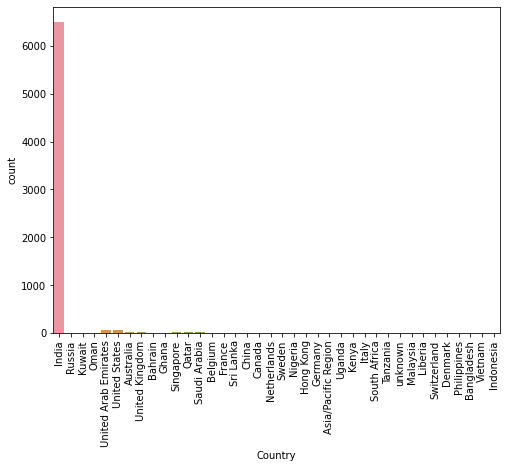

In [12]:
# Looking at columns with missing values less than 30 %

"""
Country
Specialization                               
How did you hear about X Education           
What is your current occupation              
What matters most to you in choosing a course
"""
plt.figure(figsize=(8, 6))
sns.countplot(lead_df.Country)
plt.xticks(rotation=90)
plt.show()

In [13]:
lead_df.Country.value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Philippines                2
Ghana                      2
Italy                      2
Bangladesh                 2
Uganda                     2
Russia                     1
Kenya                      1
Switzerland                1
Malaysia                   1
Vietnam                    1
Denmark                    1
Sri Lanka     

In [14]:
# looking at the country column value counts, 'India' is the mode
# hence we would be replacing the missing values with 'India'

lead_df.loc[lead_df.Country.isnull(), "Country"] = 'India'

lead_df[lead_df.Country.isnull()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [15]:
lead_df.Country.value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Philippines                2
Ghana                      2
Italy                      2
Bangladesh                 2
Uganda                     2
Russia                     1
Kenya                      1
Switzerland                1
Malaysia                   1
Vietnam                    1
Denmark                    1
Sri Lanka     

In [16]:
# Looking at Specialization

lead_df.Specialization.value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
print(lead_df.shape)

(9074, 37)


In [18]:
# Replacing 'Select' and NaN values with 'Others' as 'Select' would mean the
# user has not provided specialization

lead_df["Specialization"] = np.where((lead_df.Specialization == 'Select') | (lead_df.Specialization.isnull()),
                                     'Others', lead_df.Specialization)

lead_df.Specialization.value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
lead_df.shape

(9074, 37)

In [20]:
# missing values are replaced
lead_df.Specialization.isnull().sum()

0

In [21]:
# looking at the missing values now

round((lead_df.isnull().sum() / lead_df.shape[0]) * 100 ,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               24.25
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper 

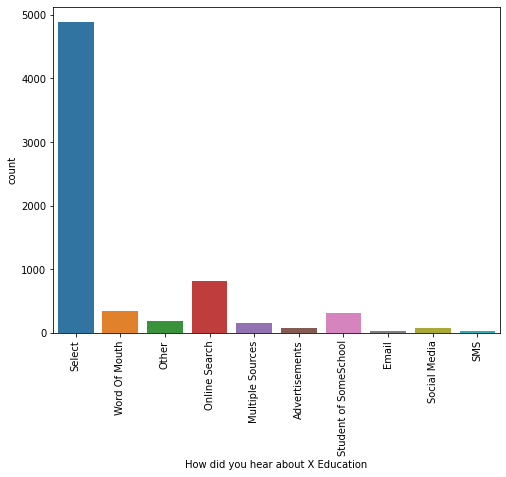

In [22]:
# looking at other columns with missing values

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["How did you hear about X Education"])
plt.xticks(rotation=90)
plt.show()

In [23]:
# Replacing 'Select' and NaN values with 'Others' as 'Select' would mean the
# user has not provided any choice

lead_df["How did you hear about X Education"] = np.where(
    (lead_df["How did you hear about X Education"] == 'Select') 
    | (lead_df["How did you hear about X Education"].isnull())
      | (lead_df["How did you hear about X Education"] == 'Other'),
                                     'Others', lead_df["How did you hear about X Education"])

lead_df["How did you hear about X Education"].value_counts()

Others                   7272
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [24]:
lead_df["How did you hear about X Education"].isnull().sum()

0

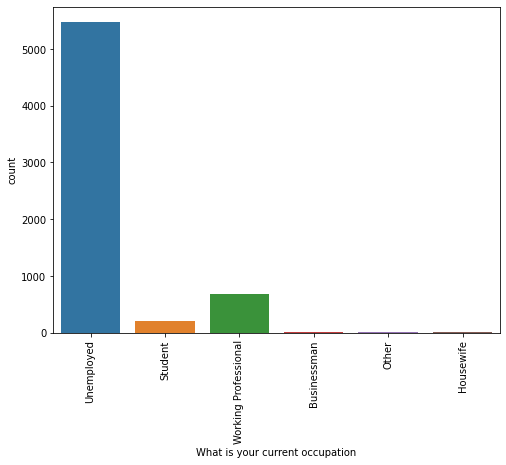

In [25]:
# Looking at "What is your current occupation"

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["What is your current occupation"])
plt.xticks(rotation=90)
plt.show()

In [26]:
# Replacing the Nan values with 'Unemployed'

lead_df.loc[lead_df["What is your current occupation"].isnull(), "What is your current occupation"] = "Unemployed"

lead_df["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
lead_df["What is your current occupation"].isnull().sum()

0

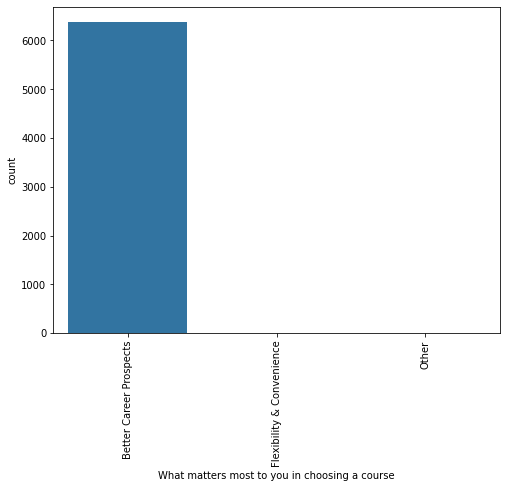

In [28]:
# Looking at "What matters most to you in choosing a course"

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["What matters most to you in choosing a course"])
plt.xticks(rotation=90)
plt.show()

In [29]:
# looking at value_counts for "What matters most to you in choosing a course"

lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6370
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
# Replacing the Nan values with "Better Career Prospects"

lead_df["What matters most to you in choosing a course"].fillna("Better Career Prospects", inplace=True)

lead_df["What matters most to you in choosing a course"].isnull().sum()

0

In [31]:
# Looking at the missing values again
view_missing(lead_df)

,Columns,Missing_Values_Percentage
25,Lead Quality,52.02
33,Asymmetrique Profile Score,45.77
32,Asymmetrique Activity Score,45.77
31,Asymmetrique Profile Index,45.77
30,Asymmetrique Activity Index,45.77
24,Tags,36.67
28,Lead Profile,29.78
29,City,15.64
21,Digital Advertisement,0.00
22,Through Recommendations,0.00


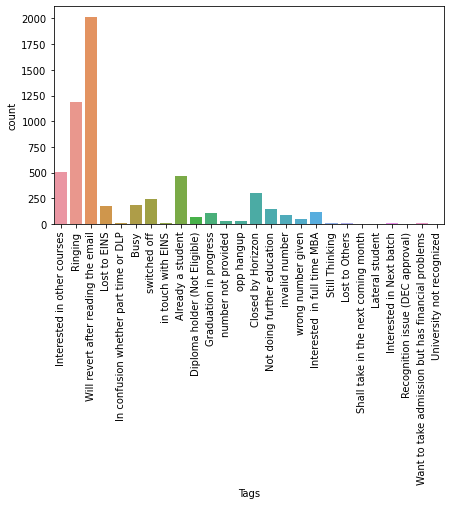

In [32]:
# Looking at 'Tags'

plt.figure(figsize=(7, 4))
sns.countplot(lead_df['Tags'])
plt.xticks(rotation=90)
plt.show()

We will replace the missing values with "Will revert after reading the email"

In [33]:
# Filling the missing values

lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Will revert after reading the email')

view_missing(lead_df)

,Columns,Missing_Values_Percentage
25,Lead Quality,52.02
33,Asymmetrique Profile Score,45.77
32,Asymmetrique Activity Score,45.77
31,Asymmetrique Profile Index,45.77
30,Asymmetrique Activity Index,45.77
28,Lead Profile,29.78
29,City,15.64
21,Digital Advertisement,0.00
22,Through Recommendations,0.00
23,Receive More Updates About Our Courses,0.00


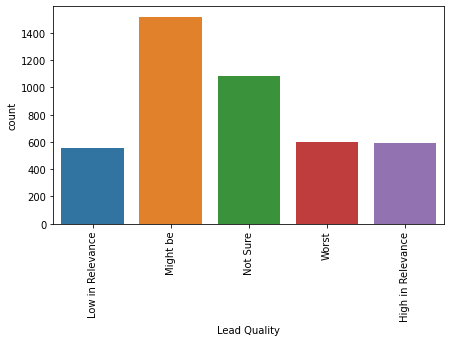

In [34]:
# Looking at Lead Quality

plt.figure(figsize=(7, 4))
sns.countplot(lead_df["Lead Quality"])
plt.xticks(rotation=90)
plt.show()

We will replace the missing values in this column by 'Not Sure'

In [35]:
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

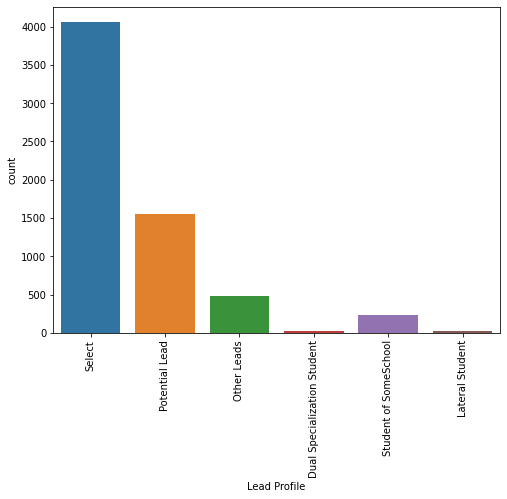

In [36]:
# Looking at Lead Profile

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["Lead Profile"])
plt.xticks(rotation=90)
plt.show()

In [37]:
# replacing the NaN and 'Select' values with 'Other Leads'

lead_df["Lead Profile"] = np.where(
    (lead_df["Lead Profile"] == 'Select') | (lead_df["Lead Profile"].isnull()),
                                     'Other Leads', lead_df["Lead Profile"])

lead_df["Lead Profile"].isnull().sum()

0

In [38]:
lead_df["Lead Profile"].value_counts()

Other Leads                    7239
Potential Lead                 1554
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

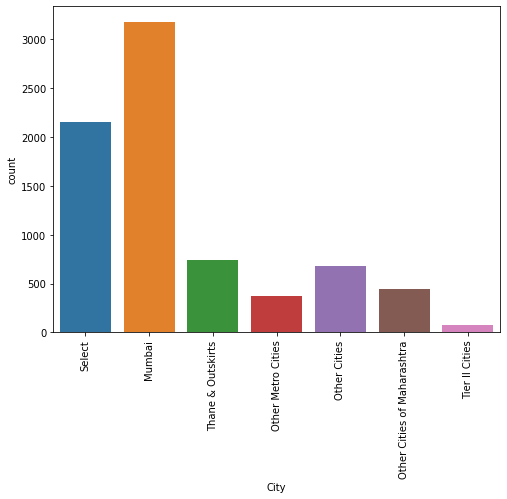

In [39]:
# Looking at City

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["City"])
plt.xticks(rotation=90)
plt.show()

In [40]:
# Replacing 'Select' and Nan values with 'Mumbai'

lead_df["City"] = np.where(
    (lead_df["City"] == 'Select') | (lead_df["City"].isnull()),
                                     'Mumbai', lead_df["City"])

lead_df["City"].isnull().sum()

0

In [41]:
lead_df["City"].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [42]:
lead_df.shape

(9074, 37)

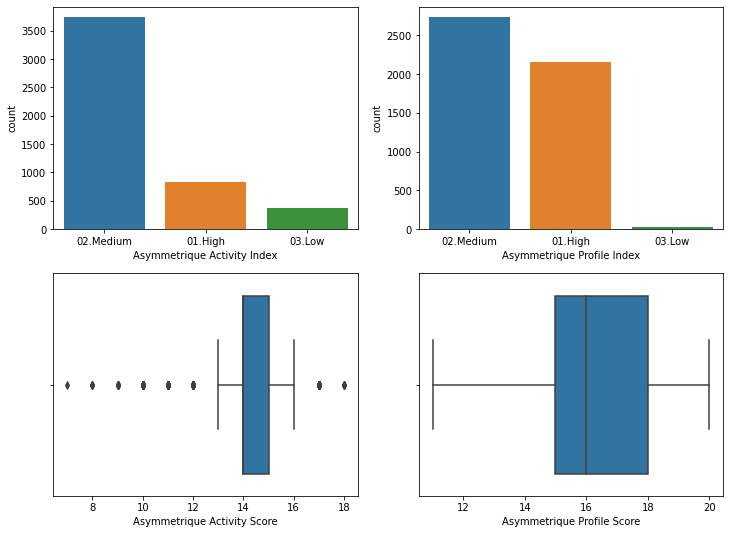

In [43]:
# Looking at Asymmetric columns
# plotting the data

plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
sns.countplot(lead_df["Asymmetrique Activity Index"])

plt.subplot(2, 2, 2)
sns.countplot(lead_df["Asymmetrique Profile Index"])

plt.subplot(2, 2, 3)
sns.boxplot(lead_df["Asymmetrique Activity Score"])

plt.subplot(2, 2, 4)
sns.boxplot(lead_df["Asymmetrique Profile Score"])

plt.show()

In [44]:
# describing the columns

lead_df["Asymmetrique Profile Score"].describe()

count    4921.000000
mean       16.337330
std         1.804918
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

In [45]:
lead_df["Asymmetrique Activity Score"].describe()

count    4921.000000
mean       14.314977
std         1.396554
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

In [46]:
# Dropping these columns as these are based on the data given by the Sales Team

cols = [
    "Asymmetrique Profile Score",
    "Asymmetrique Activity Score",
    "Asymmetrique Profile Index",
    "Asymmetrique Activity Index"
]

lead_df.drop(columns=cols, inplace=True)

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [47]:
view_missing(lead_df)

,Columns,Missing_Values_Percentage
0,Prospect ID,0.0
17,Magazine,0.0
31,A free copy of Mastering The Interview,0.0
30,I agree to pay the amount through cheque,0.0
29,City,0.0
28,Lead Profile,0.0
27,Get updates on DM Content,0.0
26,Update me on Supply Chain Content,0.0
25,Lead Quality,0.0
24,Tags,0.0


## Exploratory Data Analysis

### Univariate Analysis

#### 1. Related to Lead identification

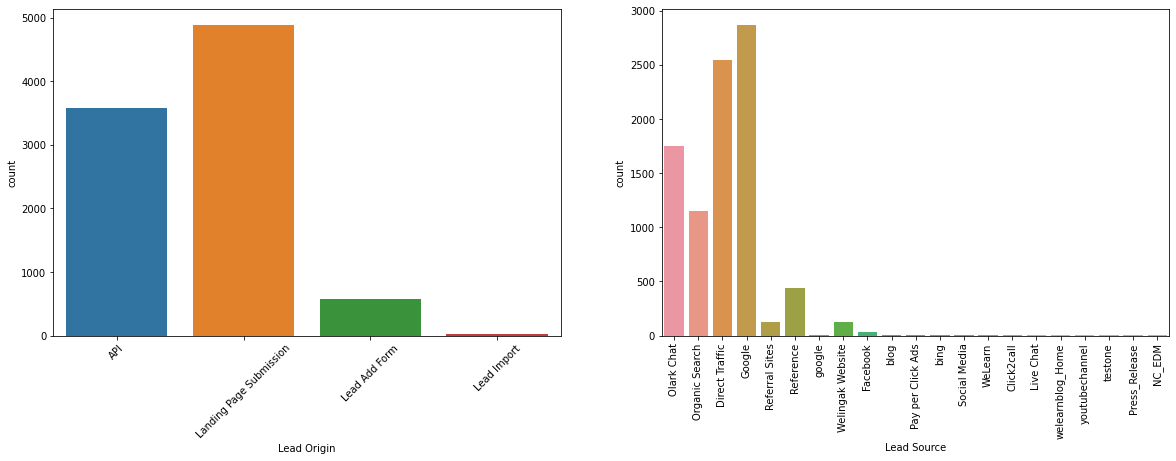

In [48]:
# Lead Origin and Lead Source

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(lead_df["Lead Origin"])
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(lead_df["Lead Source"])
plt.xticks(rotation=90)

plt.show()

- Most of the potential candidates are directly going to search engines like Google and landing on the website.
- Surprisingly, Social Media is one of the lowest preferences of source. It might be due to either no marketing or not marketing through relavant candidates

#### 2. Contact Preference of the Lead

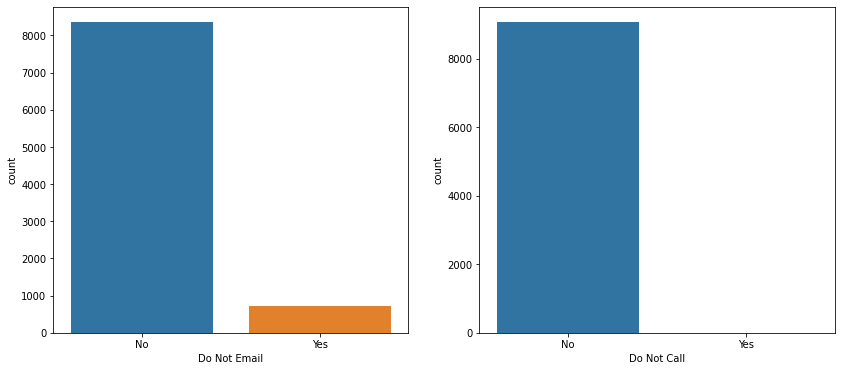

In [49]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(lead_df["Do Not Email"])

plt.subplot(1, 2, 2)
sns.countplot(lead_df["Do Not Call"])

plt.show()

 - We can see that only a few leads have preferred not to be contacted via Email

#### 3. Lead Behaviour on Website

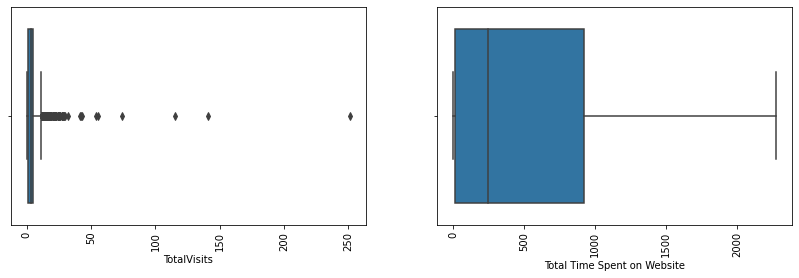

In [50]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
sns.boxplot(lead_df["TotalVisits"])
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(lead_df["Total Time Spent on Website"])
plt.xticks(rotation=90)


plt.show()

 - We can see here that we have outliers in TotalVisits, in this case the outliers could mean that a few users were very much interested in X education and probably be good leads
 - Looking at the total time spent on website , the median time spent on the website seems to be around 250s.

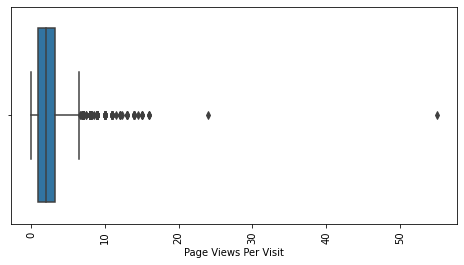

In [51]:
# Looking at "Page Views Per Visit"

plt.figure(figsize=(8, 4))
sns.boxplot(lead_df["Page Views Per Visit"])
plt.xticks(rotation=90)
plt.show()

Looking at the page views per visit we can see that there are outliers, this might indicate that the users visiting more pages on the website could be good leads

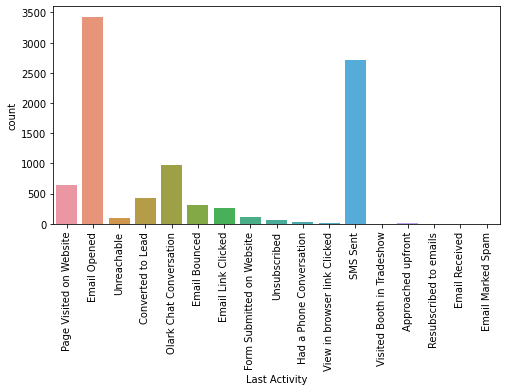

In [52]:
# Last activity

plt.figure(figsize=(8, 4))
sns.countplot(lead_df["Last Activity"])
plt.xticks(rotation=90)
plt.show()

- We can see here that the potential leads are frequently contacted through emails and it seems that this method has the most attention
- SMS sent stands in the second place

### Bivariate and Multivariate analysis

We can now look at the trends of the variables with respect to the target variable i.e. "Converted" and we'll try to make a few assumptions which could help us during model building phase

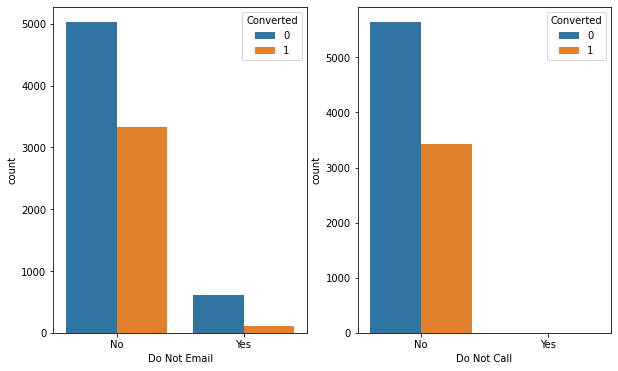

In [53]:
# Do Not Email and Do Not Call vs Converted

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.countplot(lead_df["Do Not Email"], hue="Converted", data=lead_df)

plt.subplot(1, 2, 2)
sns.countplot(lead_df["Do Not Call"], hue="Converted", data=lead_df)


plt.show()


The plots are almost identical except a few of the potential leads have choosen not to be contacted via email. We can see here that most of the successful conversions are from leads who have opted for email and phone calls 

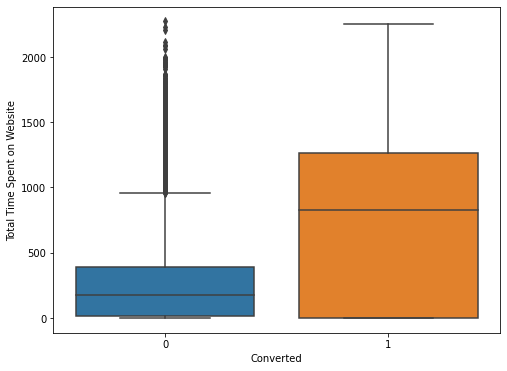

In [54]:
# Total Time Spent on Website

plt.figure(figsize=(8, 6))
sns.boxplot(y="Total Time Spent on Website", x="Converted", data=lead_df)
plt.show()

We would have to treat the outliers in "Total Time Spent on Website". We will look into this in the Outlier Analysis section

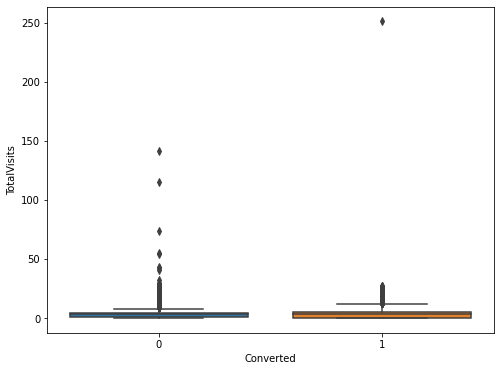

In [55]:
# TotalVisits vs converted

plt.figure(figsize=(8, 6))
sns.boxplot(y="TotalVisits", x="Converted", data=lead_df)
plt.show()

We can see that there are outliers in the TotalVisits column as well. We will cap these outliers and do further analysis

## Outlier Analysis

Looking at the continuous variables in the dataset, we found the presence of a outliers. We will be looking at each of the variables and treat the outliers 

In [56]:
# Describing the dataset

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


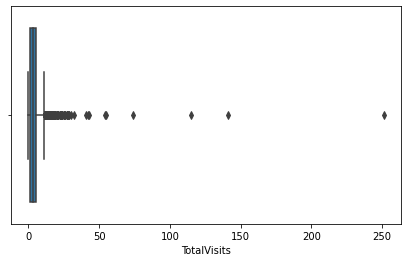

In [57]:
# TotalVisits

plt.figure(figsize=(7, 4))
sns.boxplot(lead_df["TotalVisits"])
plt.show()

In [58]:
# We will cap these outliers in the TotalVisits column, but we will look at the percentiles first

lead_df["TotalVisits"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
97%        11.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [59]:
# Capping the outliers to 97th percentile

quantiles = lead_df["TotalVisits"].quantile([0.05, 0.97]).values

lead_df.loc[lead_df["TotalVisits"] >= quantiles[1], "TotalVisits"] = quantiles[1]
lead_df.loc[lead_df["TotalVisits"] <= quantiles[0], "TotalVisits"] = quantiles[0]

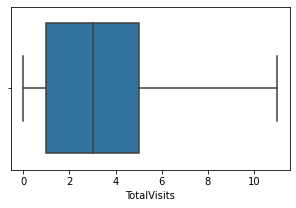

In [60]:
# Plotting the box plot

plt.figure(figsize=(5, 3))
sns.boxplot(lead_df["TotalVisits"])
plt.show()

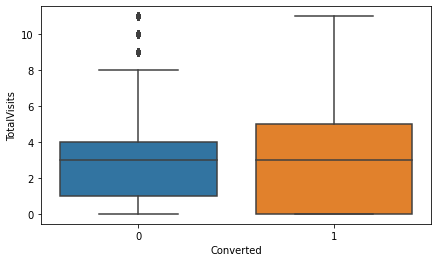

In [61]:
# Bivariate Analysis : TotalVisits vs Converted

plt.figure(figsize=(7, 4))
sns.boxplot(y="TotalVisits", x="Converted", data=lead_df)
plt.show()

Median seems to be the same. We will continue to look at the other continuous variables

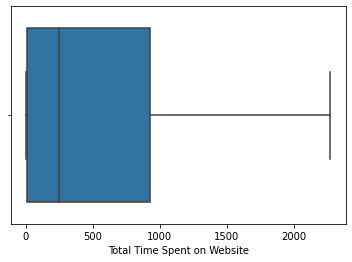

In [62]:
# Total Time Spent on Website

plt.figure(figsize=(6, 4))
sns.boxplot(lead_df["Total Time Spent on Website"])
plt.show()

There seem to be no outliers. We will look at "Total Time Spent on Website" vs "Converted"

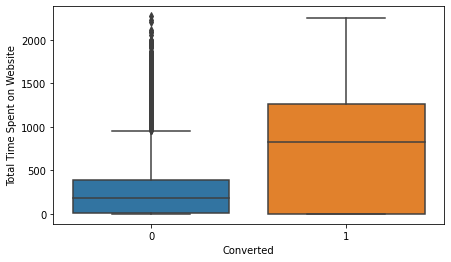

In [63]:
# Bivariate Analysis : Total Time Spent on Website vs Converted

plt.figure(figsize=(7, 4))
sns.boxplot(y="Total Time Spent on Website", x="Converted", data=lead_df)
plt.show()

Median is higher in the case of successful conversion. So leads spending more time on the website are more likely to be converted.

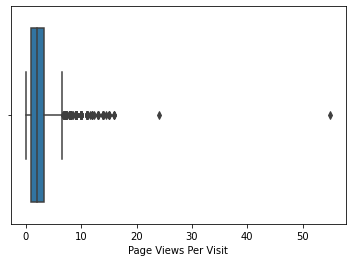

In [64]:
# Page Views Per Visit

plt.figure(figsize=(6, 4))
sns.boxplot(lead_df["Page Views Per Visit"])
plt.show()

There are outliers in this column. We will look at different quantiles to determine if we will cap the outliers

In [65]:
lead_df["Page Views Per Visit"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.97, 0.99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
97%         7.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [66]:
# Capping the outliers to 95th percentile

quantiles = lead_df["Page Views Per Visit"].quantile([0.05, 0.95]).values

lead_df.loc[lead_df["Page Views Per Visit"] >= quantiles[1], "Page Views Per Visit"] = quantiles[1]
lead_df.loc[lead_df["Page Views Per Visit"] <= quantiles[0], "Page Views Per Visit"] = quantiles[0]

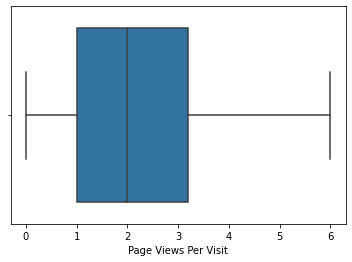

In [67]:
# Box plot

plt.figure(figsize=(6, 4))
sns.boxplot(lead_df["Page Views Per Visit"])
plt.show()

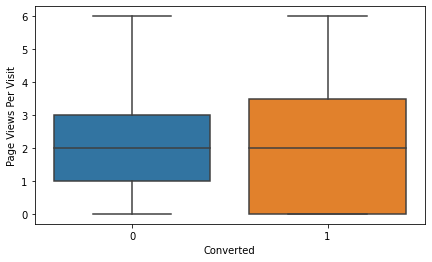

In [68]:
# Bivariate Analysis : Page Views Per Visit vs Converted

plt.figure(figsize=(7, 4))
sns.boxplot(y="Page Views Per Visit", x="Converted", data=lead_df)
plt.show()

Median seems to be the same in both the cases of conversion. No definite inference

#### We will continue Bivariate Analysis with the other variables  ...

In [69]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

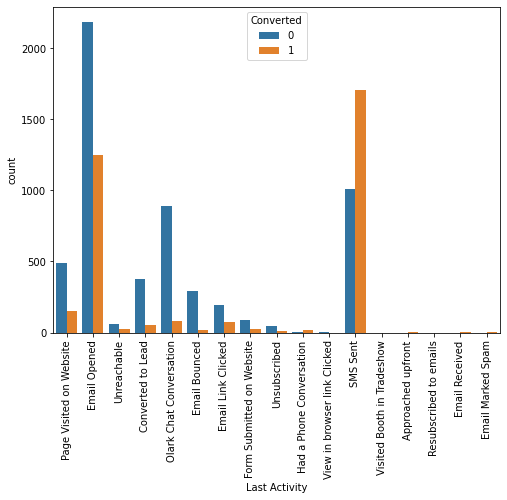

In [70]:
# Last Activity vs Converted

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["Last Activity"], hue="Converted", data=lead_df)
plt.xticks(rotation=90)
plt.show()

We can see with this plot that most number of successful conversions are from the leads who were sent an SMS and also sending an email seems to be a good way to contact the leads

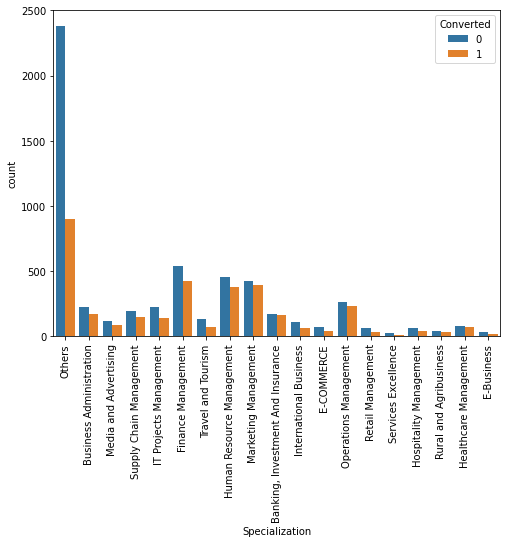

In [71]:
# Specialization vs Converted

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["Specialization"], hue="Converted", data=lead_df)
plt.xticks(rotation=90)
plt.show()

Looking at the plot, "Finance Management", "Marketing Management" and "Operations Management" seem to have a high conversion rate

In [72]:
# Taking a look at a few other variables related to "Reach of X Education"

col_list = [
    "Search",
    "Magazine",                                        
    "Newspaper Article",                               
    "X Education Forums",                              
    "Newspaper",                                       
    "Digital Advertisement",                           
    "Through Recommendations"

]

for col in col_list:
    print(col,"\n",  lead_df[col].describe(), "\n")

Search 
 count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object 

Magazine 
 count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object 

Newspaper Article 
 count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object 

X Education Forums 
 count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object 

Newspaper 
 count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object 

Digital Advertisement 
 count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object 

Through Recommendations 
 count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object 



These were the Yes / No columns indicating if the lead had come to know of X education through this medium. As we can see that all the columns have a top value of 'No', we are not able to make a definite inference.

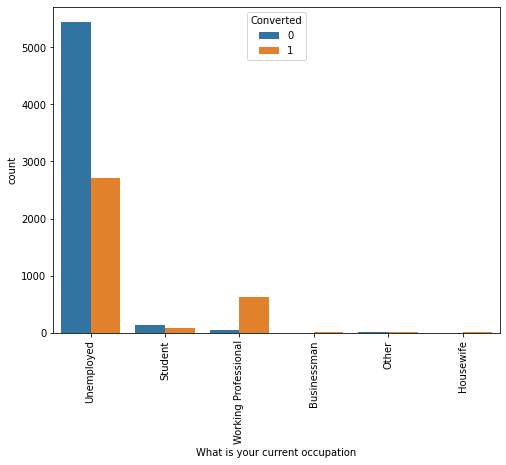

In [73]:
# What is your current occupation vs Converted

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["What is your current occupation"], hue="Converted", data=lead_df)
plt.xticks(rotation=90)
plt.show()

We can see here that working professionals have a high conversion rate. So it is suggested to look for leads in this category

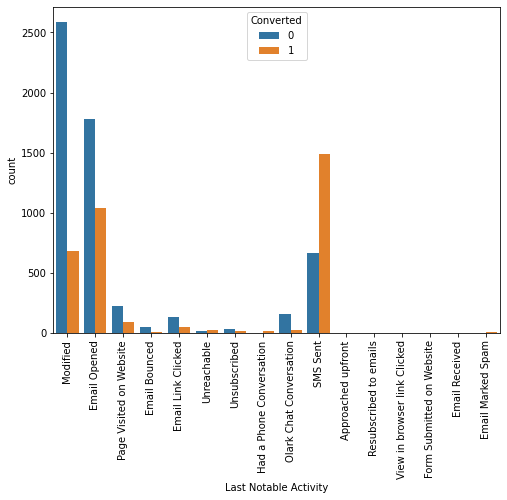

In [74]:
# Last Notable Activity vs Converted

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["Last Notable Activity"], hue="Converted", data=lead_df)
plt.xticks(rotation=90)
plt.show()

As we had seen before in the case of Last Activity, most number of successful conversions are from the leads who were sent an SMS

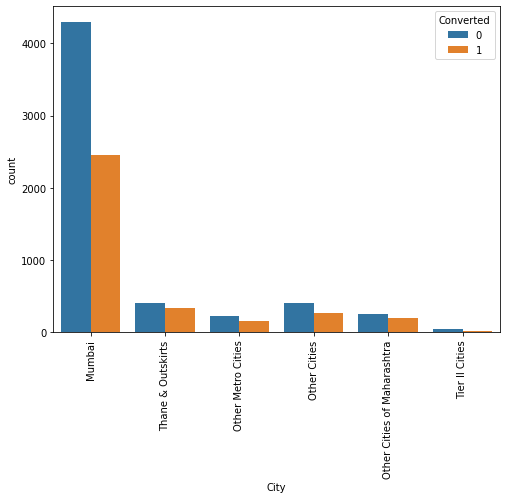

In [75]:
# City vs Converted

plt.figure(figsize=(8, 6))
sns.countplot(lead_df["City"], hue="Converted", data=lead_df)
plt.xticks(rotation=90)
plt.show()

In [76]:
# What matters most to you in choosing a course

lead_df["What matters most to you in choosing a course"].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [77]:
# How did you hear about X Education

lead_df["How did you hear about X Education"].value_counts()

Others                   7272
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [78]:
# Lead Profile

lead_df["Lead Profile"].value_counts()

Other Leads                    7239
Potential Lead                 1554
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

## Variable Selection and Transformation

In [79]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [80]:
# Based on the Univariate and Bivariate Analysis we are dropping columns
# that didn't seem to have any impact on successful conversions

to_drop = [
    "Search",
    "Magazine",                                        
    "Newspaper Article",                               
    "X Education Forums",                              
    "Newspaper",                                       
    "Digital Advertisement",                           
    "Through Recommendations",
    "Prospect ID",
    "Lead Number",
    "Country",
    "Update me on Supply Chain Content",
    "Receive More Updates About Our Courses",
    "Get updates on DM Content",
    "A free copy of Mastering The Interview",
    "I agree to pay the amount through cheque",
    "What matters most to you in choosing a course",
    "Last Activity",
    "Lead Profile"
]

df_mod = lead_df.drop(columns=to_drop)

df_mod.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Others,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Others,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Others,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Others,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [81]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Origin                         9074 non-null   object 
 1   Lead Source                         9074 non-null   object 
 2   Do Not Email                        9074 non-null   object 
 3   Do Not Call                         9074 non-null   object 
 4   Converted                           9074 non-null   int64  
 5   TotalVisits                         9074 non-null   float64
 6   Total Time Spent on Website         9074 non-null   int64  
 7   Page Views Per Visit                9074 non-null   float64
 8   Specialization                      9074 non-null   object 
 9   How did you hear about X Education  9074 non-null   object 
 10  What is your current occupation     9074 non-null   object 
 11  Tags                                9074 no

In [82]:
# Transforming Yes / No columns into 0 / 1 columns

df_mod["Do Not Email"] = np.where(df_mod["Do Not Email"] == "Yes", 1, 0)

df_mod["Do Not Call"] = np.where(df_mod["Do Not Call"] == "Yes", 1, 0)

df_mod.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Others,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Others,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Others,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [83]:
# Converting TotalVisits to 'int64' dtype

df_mod["TotalVisits"] = df_mod["TotalVisits"].astype('int')

df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Lead Origin                         9074 non-null   object 
 1   Lead Source                         9074 non-null   object 
 2   Do Not Email                        9074 non-null   int32  
 3   Do Not Call                         9074 non-null   int32  
 4   Converted                           9074 non-null   int64  
 5   TotalVisits                         9074 non-null   int32  
 6   Total Time Spent on Website         9074 non-null   int64  
 7   Page Views Per Visit                9074 non-null   float64
 8   Specialization                      9074 non-null   object 
 9   How did you hear about X Education  9074 non-null   object 
 10  What is your current occupation     9074 non-null   object 
 11  Tags                                9074 no

### Dummy column creation

In [84]:
# creating dummy cols for categorical variables

cols_for_dummies = [
    "Lead Origin",
    "Lead Source",
    "Specialization",
    "How did you hear about X Education",
    "Last Notable Activity",
    "What is your current occupation",
    "Lead Quality",
    "Tags",
    "City",
]

dummy_cols = pd.get_dummies(df_mod[cols_for_dummies], drop_first=True)
    
dummy_cols.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Others,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [85]:
# merging the dummy cols with the data

df_mod = pd.concat([df_mod, dummy_cols], axis=1)
df_mod.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Others,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0,0,0.0,Others,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5,674,2.5,Others,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [86]:
# dropping the categorical variables

df_mod.drop(columns=cols_for_dummies, inplace=True)

In [87]:
df_mod.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Others,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,5,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0

## Model Building

We are going to perform Logistic Regression for predicting the converted rate of the candidates

#### Steps followed:
- Splitting the dataset into train and test data
- We scale the continuous variables post splitting the data
- Performing RFE for feature selection
- Using the variables extracted from RFE, we build the first model
- From the built model, we examine the p-value to understand the variable significance and drop the variables one by one which are insignificant until all the variables p-value is closer to 0.
- After finalizing the model, we evaluate the model using appropriate metrics
- Once we feel the model is significant for predicting training data, we test it on test data and check it's predicting power.
- Then we save the final predictions into a csv file.

### Splitting data into train and test data

In [88]:
# Splitting into independent and target variables

X = df_mod.drop(columns=["Converted"])

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Others,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [89]:
y = df_mod["Converted"]

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [90]:
# Using train_test_split to split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the continuous variables

In [91]:
scaler = StandardScaler()

X_train.loc[:, ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[[
    'TotalVisits', 
    'Total Time Spent on Website', 
    'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Others,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.431325,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.431325,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.124566,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

### Applying RFE for feature extraction

In [92]:
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe_df = pd.DataFrame((zip(X_train.columns, rfe.support_, rfe.ranking_)),\
             columns = ['Column', 'Support', 'Ranking']).sort_values(by='Ranking')
rfe_df[rfe_df.Support]

,Column,Support,Ranking
0,Do Not Email,True,1
21,Lead Source_Welingak Website,True,1
96,Tags_Will revert after reading the email,True,1
65,Last Notable Activity_SMS Sent,True,1
98,Tags_invalid number,True,1
91,Tags_Ringing,True,1
99,Tags_number not provided,True,1
79,Tags_Closed by Horizzon,True,1
78,Tags_Busy,True,1
77,Lead Quality_Worst,True,1


In [94]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Notable Activity_SMS Sent',
       'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

In [95]:
# Defining a function for calculating VIF


def calculate_VIF(df):
    
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Building the first model

In [96]:
X_train_sm = sm.add_constant(X_train[col])
lm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = lm.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.2
Date:                Mon, 17 May 2021   Deviance:                       3176.4
Time:                        10:26:24   Pearson chi2:                 3.57e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [97]:
calculate_VIF(X_train[col])

,features,VIF
4,Lead Quality_Not Sure,2.71
10,Tags_Will revert after reading the email,2.66
1,Lead Origin_Lead Add Form,1.58
9,Tags_Ringing,1.55
3,Last Notable Activity_SMS Sent,1.54
2,Lead Source_Welingak Website,1.34
7,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.12
6,Tags_Busy,1.11
13,Tags_switched off,1.10


Tags_invalid number ,Tags_number not provided, Tags_wrong number given have p value at 0.999, so we drop them one by one and build another model to check if any changes occur in their significance.

We can also see that VIF's are less than 5 for every variable. So, we do not need to worrry about any multi-collinearity

In [98]:
# dropping 'Tags_number not provided'

col_1 = col.drop("Tags_number not provided", 1)

In [99]:
X_train_sm = sm.add_constant(X_train[col_1])
lm_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res_1 = lm_1.fit()
print(res_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1592.2
Date:                Mon, 17 May 2021   Deviance:                       3184.3
Time:                        10:26:25   Pearson chi2:                 3.54e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [100]:
calculate_VIF(X_train[col_1])

,features,VIF
4,Lead Quality_Not Sure,2.70
10,Tags_Will revert after reading the email,2.65
1,Lead Origin_Lead Add Form,1.58
9,Tags_Ringing,1.55
3,Last Notable Activity_SMS Sent,1.53
2,Lead Source_Welingak Website,1.34
7,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.11
6,Tags_Busy,1.11
12,Tags_switched off,1.10


Now we drop Tags_wrong number given as it is insignificant to the model. Clearly, if a candidate gives wrong number, he can be contacted via another channels, so it is not significant to predict the conversion rate

In [101]:
col_2 = col_1.drop("Tags_wrong number given", 1)

In [102]:
X_train_sm = sm.add_constant(X_train[col_2])
lm_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res_2 = lm_2.fit()
print(res_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1594.8
Date:                Mon, 17 May 2021   Deviance:                       3189.6
Time:                        10:26:25   Pearson chi2:                 3.54e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [103]:
calculate_VIF(X_train[col_2])

,features,VIF
4,Lead Quality_Not Sure,2.68
10,Tags_Will revert after reading the email,2.62
1,Lead Origin_Lead Add Form,1.58
9,Tags_Ringing,1.54
3,Last Notable Activity_SMS Sent,1.53
2,Lead Source_Welingak Website,1.34
7,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.11
6,Tags_Busy,1.11
12,Tags_switched off,1.10


Now we drop the remaining column which is insignificant and build the model again

In [104]:
col_3 = col_2.drop("Tags_invalid number", 1)

In [105]:
X_train_sm = sm.add_constant(X_train[col_3])
lm_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res_3 = lm_3.fit()
print(res_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.0
Date:                Mon, 17 May 2021   Deviance:                       3202.0
Time:                        10:26:25   Pearson chi2:                 3.48e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [106]:
calculate_VIF(X_train[col_3])

,features,VIF
4,Lead Quality_Not Sure,2.62
10,Tags_Will revert after reading the email,2.57
1,Lead Origin_Lead Add Form,1.58
9,Tags_Ringing,1.52
3,Last Notable Activity_SMS Sent,1.51
2,Lead Source_Welingak Website,1.34
7,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.10
6,Tags_Busy,1.10
11,Tags_switched off,1.10


We can see that there are no insignificant variables and also the VIFs for all the variables are less than 5, so we can continue with model evaluation

### Model Evaluation

In [107]:
# Storing the predicted values on train data into an array for further evaluation
y_train_pred = res_3.predict(X_train_sm)
y_train_pred[:5]

3009    0.189946
1012    0.061006
9226    0.000707
4750    0.784007
7987    0.977108
dtype: float64

In [108]:
# Converting into Numpy array of 1 D
y_train_pred = y_train_pred.values
y_train_pred[:5]

array([1.89945603e-01, 6.10055097e-02, 7.07499981e-04, 7.84007054e-01,
       9.77108077e-01])

In [109]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Converted_prob' : y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.189946,3009
1,0,0.061006,1012
2,0,0.000707,9226
3,1,0.784007,4750
4,1,0.977108,7987


From the predictions, setting cutoff value of 0.5 initially to evaluate.

In [110]:
y_train_pred_final['predicted'] = np.where(y_train_pred_final.Converted_prob > 0.5, 1, 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.189946,3009,0
1,0,0.061006,1012,0
2,0,0.000707,9226,0
3,1,0.784007,4750,1
4,1,0.977108,7987,1


In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)

confusion

array([[3751,  154],
       [ 357, 2089]], dtype=int64)

In [112]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

The metrics interpretation to our case study:

**Sensitivity** : How many candidates are predicted to be converted correctly from the total converted candidates, i.e., True Positive on True Positives and False Negatives. It is also called **Recall**

From the problem statement,<br>
"The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%."

So we need sensitivity metric to be around 80 percent

Other Metrics:
- **Specificity** : How many candidates are predicted not to be converted correctly from the total converted candidates, i.e., True Negatives on True Negatives and False Positives
- **Precision** : How many candidates are predicted correctly as converted out of all values predicted as converted

In [113]:
# sensitivity --- should be around 80 %
print("Sensitivity :", TP / float(TP+FN))

Sensitivity : 0.8540474243663123


In [114]:
# Recall (also called sensitivity)
print("Recall :", TP / float(TP+FN))

Recall : 0.8540474243663123


In [115]:
# Specificity
print("Specificity :", TN / float (TN + FP))

Specificity : 0.9605633802816902


#### An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

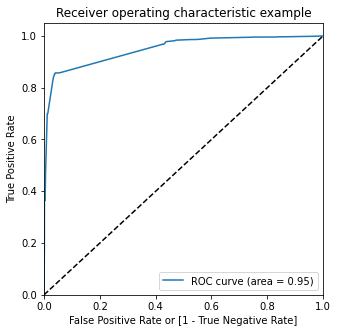

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### We will calculate the predictions for different cutoff values


In [119]:
# different columns for different thresholds

numbers = [float(x) / 10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = np.where(y_train_pred_final.Converted_prob > i, 1, 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1


In [120]:
# sensitivity for different thresholds


cutoffs = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci'])

for i in numbers:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensi = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    speci = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    cutoffs.loc[i] =[i, accuracy, sensi, speci]    

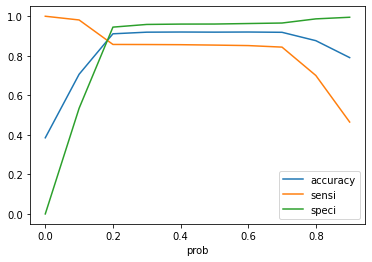

In [121]:
# plot accuracy, sensitivity and specificity cutoff curve
cutoffs.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [122]:
# taking cutoff as 0.2

y_train_pred_final['final_predicted'] = np.where(y_train_pred_final.Converted_prob > 0.2, 1, 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [123]:
# calculating confusion matrix for cutoff 0.2 predictions

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

TP = confusion2[1, 1]
TN = confusion2[0, 0]
FP = confusion2[0, 1]
FN = confusion2[1, 0]

In [124]:
# sensitivity incase of 0.2
print("Sensitivity for the predictions made with 0.2 as a cutoff :", TP / float(TP+FN))

Sensitivity for the predictions made with 0.2 as a cutoff : 0.857318070318888


## Precision and Recall for the predictions made with 0.2 as a cutoff

In [125]:
# Precision for the predictions made with 0.2 as a cutoff

print("Precision :", TP / float(TP + FP))

Precision : 0.9070069204152249


In [126]:
# Recall for the predictions made with 0.2 as a cutoff

print("Recall :", TP / float(TP + FN))

Recall : 0.857318070318888


## Precision and Recall Tradeoff

In [127]:
from sklearn.metrics import precision_recall_curve

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

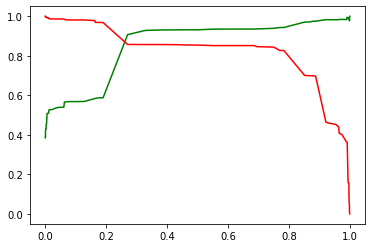

In [129]:
# Plotting the tradeoff curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [130]:
X_test.loc[:, ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[
    ['TotalVisits',
     'Total Time Spent on Website',
     'Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Others,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3271,0,0,0.279059,-0.591008,0.998931,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.627468,1.894051,1.564920,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.417757,-0.743117,-0.133048,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,

In [131]:
X_test = X_test[col_3]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Notable Activity_SMS Sent,Lead Quality_Not Sure,Lead Quality_Worst,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
3271,0,0,0,0,1,0,0,0,0,0,1,0
1490,0,0,0,0,0,0,0,0,0,0,1,0
7936,0,0,0,0,1,0,0,0,0,0,1,0
4216,0,1,0,0,0,0,0,1,0,0,0,0
3830,0,0,0,0,1,0,0,0,0,0,1,0


In [132]:
X_test_sm = sm.add_constant(X_test)

In [133]:
y_test_pred = res_3.predict(X_test_sm)

In [134]:
y_test_pred[:5]

3271    0.189946
1490    0.888099
7936    0.189946
4216    0.999300
3830    0.189946
dtype: float64

In [135]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [136]:
y_pred_1.head()

,0
3271,0.189946
1490,0.888099
7936,0.189946
4216,0.999300
3830,0.189946


In [137]:
y_test_df = pd.DataFrame(y_test)

# Prospect ID as index
y_test_df['Prospect ID'] = y_test_df.index

# Resetting index to concat the dataframes horizontally
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.189946
1,1,1490,0.888099
2,0,7936,0.189946
3,1,4216,0.999300
4,0,3830,0.189946


In [138]:
y_pred_final = y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.189946
1,1,1490,0.888099
2,0,7936,0.189946
3,1,4216,0.999300
4,0,3830,0.189946


In [139]:
y_pred_final['final_predicted'] = np.where(y_pred_final.Converted_prob > 0.2, 1, 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.189946,0
1,1,1490,0.888099,1
2,0,7936,0.189946,0
3,1,4216,0.999300,1
4,0,3830,0.189946,0


In [140]:
# accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9078222548659567

In [141]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1640,   94],
       [ 157,  832]], dtype=int64)

In [142]:
TP = confusion2[1, 1]  
TN = confusion2[0, 0]
FP = confusion2[0, 1]
FN = confusion2[1, 0]

### Sensitivity and Specificity

In [143]:
# test sensitivity
print("Sensitivity :", TP / float(TP+FN))

# test specificity
print("Specificity :", TN / float(TN+FP))

Sensitivity : 0.8412537917087968
Specificity : 0.9457900807381776


### Precision and Recall

In [144]:
# test precision
print("Precision :", TP / float(TP + FP))

# test recall
print("Recall :", TP / float(TP + FN))

Precision : 0.8984881209503239
Recall : 0.8412537917087968


We have build a logisitic regression model that predicted the conversion rate of the candidates and found the model sensitivity at 84 percent on test data.

## Final goals of the case study
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

We can consider the probability scores we got during the prediction as the score, ranging from 0 to 100

In [145]:
y_test_pred_final = res_3.predict(X_test_sm)
X_test['ConversionRate'] = y_test_pred_final

y_train_pred_final = res_3.predict(X_train_sm)
X_train['ConversionRate'] = y_train_pred_final

In [146]:
X_final = pd.concat([X_train, X_test]).sort_index()
lead_df['ConversionRate'] = X_final['ConversionRate']

In [147]:
lead_df['ConversionRate'] = round(lead_df['ConversionRate'] * 100, 0)

In [148]:
lead_df.to_csv('final_predictions.csv')

In [149]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,ConversionRate
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other Leads,Mumbai,No,No,Modified,13.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other Leads,Mumbai,No,No,Email Opened,0.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Others,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened,89.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other Leads,Mumbai,No,No,Modified,0.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other Leads,Mumbai,No,No,Modified,89.0


# Conclusion

- We can see that Do Not Email column has an impact on the lead conversion. Indicating that leads who opt for mail communication can be a potential conversion

- Other columns such as Lead Source (website) , Lead origin etc have been idenitified as contributors for conversion.

- Lead Score column has been made to help the sales team identify 'Hot Leads'. it ranges from 0 - 100. Higher score would mean potential successful conversion

- The target lead conversion rate i.e. Sensitivity of the model is 84 % as expected by the CEO.